In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Загрузка данных

In [2]:
data = pd.read_csv('./data/simple_amine_treatment.csv', on_bad_lines='skip')
data.drop(data.columns[[19, 39, 59, 79]], axis = 1, inplace=True)
data

,mass_flow_inlet_vapour,temperature_inlet_vapour,h2_mass_frac_inlet_vapour,o2_mass_frac_inlet_vapour,ch4_mass_frac_inlet_vapour,c2h6_mass_frac_inlet_vapour,c3h8_mass_frac_inlet_vapour,c3h6_mass_frac_inlet_vapour,i-c4h10_mass_frac_inlet_vapour,n-c4h10_mass_frac_inlet_vapour,...,n-c4h10_mass_frac_outlet_liquid,c4h8_mass_frac_outlet_liquid,i-c5h12_mass_frac_outlet_liquid,n-c5h12_mass_frac_outlet_liquid,c6h14_mass_frac_outlet_liquid,h2s_mass_frac_outlet_liquid,h2o_mass_frac_outlet_liquid,co2_mass_frac_outlet_liquid,mea_mass_frac_outlet_liquid,n2_mass_frac_outlet_liquid
0,8230.000000,26.356925,0.002678,0.003085,0.038629,0.057053,0.093218,0.114167,0.327486,0.052248,...,0.000007,0.000008,0.000041,1.061325e-06,0.000003,0.004943,0.879599,0.0,0.115320,7.472442e-07
1,8230.000000,26.356934,0.002746,0.005573,0.039530,0.077628,0.114350,0.164673,0.229043,0.069246,...,0.000009,0.000006,0.000033,9.946262e-07,0.000004,0.001950,0.882223,0.0,0.115705,8.428106e-07
2,8230.000000,26.356956,0.001068,0.006216,0.037546,0.103028,0.103540,0.197695,0.146631,0.073484,...,0.000009,0.000007,0.000060,1.028719e-06,0.000002,0.005852,0.878779,0.0,0.115231,6.552616e-07
3,8230.000000,26.356959,0.002433,0.004748,0.059665,0.076898,0.051245,0.225164,0.174282,0.057425,...,0.000007,0.000006,0.000061,6.696305e-07,0.000003,0.003885,0.880478,0.0,0.115505,8.013086e-07
4,8230.000000,26.356927,0.002521,0.006390,0.014516,0.067419,0.115213,0.086547,0.300551,0.067124,...,0.000009,0.000008,0.000057,7.836787e-07,0.000003,0.003309,0.881072,0.0,0.115460,5.362537e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405202,10709.673592,31.426712,0.002994,0.005206,0.027702,0.109379,0.160018,0.077494,0.204008,0.033821,...,0.000005,0.000260,0.001069,7.036836e-07,0.000005,0.109029,0.641860,0.0,0.247574,2.131557e-07
405203,4964.078481,23.591352,0.001448,0.003202,0.042870,0.099048,0.155663,0.112820,0.147446,0.072947,...,0.000009,0.000030,0.000124,8.899204e-07,0.000002,0.031418,0.800960,0.0,0.167387,6.335792e-07
405204,5322.066385,37.488453,0.002957,0.002446,0.029468,0.065700,0.116935,0.117383,0.186575,0.048985,...,0.000004,0.000003,0.000021,5.482243e-07,0.000002,0.031091,0.907238,0.0,0.061605,5.886410e-07
405205,10108.693543,37.888221,0.002676,0.004211,0.025784,0.086053,0.086514,0.110518,0.234773,0.032815,...,0.000005,0.000337,0.001045,8.434506e-07,0.000005,0.108137,0.659855,0.0,0.230386,5.470611e-07


In [34]:
small_data = data.sample(frac=0.2)
# small_data['h2s_mass_frac_outlet_vapour'] = small_data['h2s_mass_frac_outlet_vapour'] * 10000
# small_data['h2s_mass_frac_outlet_vapour']

In [35]:
list(data.columns)

['mass_flow_inlet_vapour',
 'temperature_inlet_vapour',
 'h2_mass_frac_inlet_vapour',
 'o2_mass_frac_inlet_vapour',
 'ch4_mass_frac_inlet_vapour',
 'c2h6_mass_frac_inlet_vapour',
 'c3h8_mass_frac_inlet_vapour',
 'c3h6_mass_frac_inlet_vapour',
 'i-c4h10_mass_frac_inlet_vapour',
 'n-c4h10_mass_frac_inlet_vapour',
 'c4h8_mass_frac_inlet_vapour',
 'i-c5h12_mass_frac_inlet_vapour',
 'n-c5h12_mass_frac_inlet_vapour',
 'c6h14_mass_frac_inlet_vapour',
 'h2s_mass_frac_inlet_vapour',
 'h2o_mass_frac_inlet_vapour',
 'co2_mass_frac_inlet_vapour',
 'mea_mass_frac_inlet_vapour',
 'n2_mass_frac_inlet_vapour',
 'mass_flow_inlet_liquid',
 'temperature_inlet_liquid',
 'h2_mass_frac_inlet_liquid',
 'o2_mass_frac_inlet_liquid',
 'ch4_mass_frac_inlet_liquid',
 'c2h6_mass_frac_inlet_liquid',
 'c3h8_mass_frac_inlet_liquid',
 'c3h6_mass_frac_inlet_liquid',
 'i-c4h10_mass_frac_inlet_liquid',
 'n-c4h10_mass_frac_inlet_liquid',
 'c4h8_mass_frac_inlet_liquid',
 'i-c5h12_mass_frac_inlet_liquid',
 'n-c5h12_mass_fra

# Графики

# Получаем обучающую и тестовую выборку

In [36]:
mini_data = small_data[['mass_flow_inlet_vapour', 'temperature_inlet_vapour',
                       'mass_flow_inlet_liquid', 'temperature_inlet_liquid',
                        'mass_flow_outlet_vapour','temperature_outlet_vapour'
                       ]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), ['mass_flow_inlet_vapour', 'temperature_inlet_vapour',
                    'mass_flow_inlet_liquid', 'temperature_inlet_liquid',
                    ])
)

# Создаем X и y
# X = mini_data.drop('ch4_mass_frac_outlet_vapour', axis=1)
# y = mini_data['ch4_mass_frac_outlet_vapour']
X = mini_data.iloc[:, [0, 1, 2, 3]]
y = mini_data.iloc[:, [5]]

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

# Собираем нейронную сеть

In [ ]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
amine_treatment_model = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation='relu', input_shape=[4]),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
amine_treatment_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

# 3. Fit the model
amine_treatment_model.fit(X_train_normal, y_train, epochs=50, batch_size=32)

Epoch 1/50
2026/2026 [==============================] - 6s 3ms/step - loss: 6.5528 - mae: 6.5528
Epoch 2/50
2026/2026 [==============================] - 5s 3ms/step - loss: 5.8046 - mae: 5.8046
Epoch 3/50
2026/2026 [==============================] - 5s 3ms/step - loss: 5.5844 - mae: 5.5844
Epoch 4/50
2026/2026 [==============================] - 5s 3ms/step - loss: 5.4634 - mae: 5.4634
Epoch 5/50
2026/2026 [==============================] - 5s 3ms/step - loss: 5.3837 - mae: 5.3837
Epoch 6/50
2026/2026 [==============================] - 6s 3ms/step - loss: 5.3178 - mae: 5.3178
Epoch 7/50
2026/2026 [==============================] - 5s 3ms/step - loss: 5.2180 - mae: 5.2180
Epoch 8/50
2026/2026 [==============================] - 5s 3ms/step - loss: 5.1476 - mae: 5.1476
Epoch 9/50
2026/2026 [==============================] - 5s 3ms/step - loss: 5.1048 - mae: 5.1048
Epoch 10/50
2026/2026 [==============================] - 4s 2ms/step - loss: 5.0556 - mae: 5.0556
Epoch 11/50
2026/2026 [======

In [31]:
amine_treatment_model.evaluate(X_test_normal)

203/203 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - mae: 0.0000e+00


[0.0, 0.0]

In [32]:
y_pred = amine_treatment_model.predict(X_test_normal)
y_pred

203/203 [==============================] - 1s 2ms/step


array([[30.446417],
       [38.923046],
       [51.321846],
       ...,
       [30.774212],
       [30.55494 ],
       [45.230705]], dtype=float32)

In [33]:
y_test

,temperature_outlet_vapour
28649,30.637880
309175,37.173204
254878,47.035973
228098,41.680100
289957,42.162246
...,...
111177,25.436379
318451,35.897783
4173,30.611406
73429,30.566309


In [11]:
# let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, tests and compares predictions to ground truht labels.
  """
  plt.figure(figsize=(10, 10))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label='Testing data')
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c='r', label='Predictions')
  # Show the legend
  plt.legend();

In [12]:
len(X_train_normal), len(y_train), len(X_test_normal), len(y_test), len(y_pred)

(25933, 25933, 6484, 6484, 6484)

In [13]:
# plt.figure(figsize=(10, 10))
# plt.scatter(X_train_normal[:, 0], y_train, c='b', label='Training data')

# plt.legend();

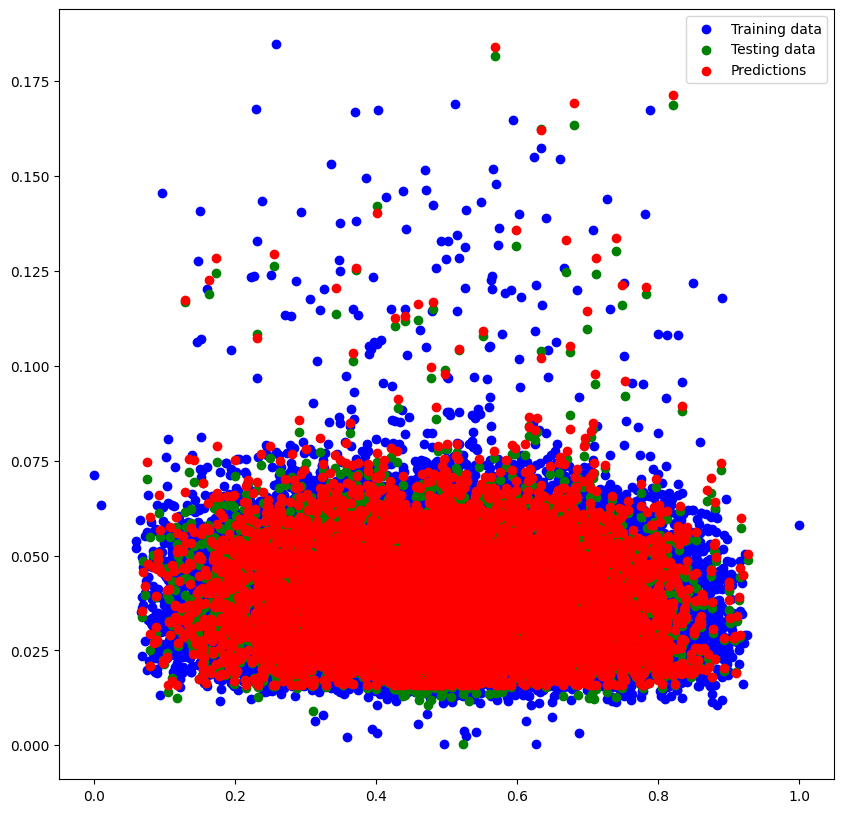

In [14]:
plot_predictions(train_data=X_train_normal[:, 0],
                     train_labels=y_train,
                     test_data=X_test_normal[:, 0],
                     test_labels=y_test,
                     predictions=y_pred
                )

In [98]:
len(y_pred[y_pred < 0])

3923